In [1]:
import numpy as np
import pandas as pd
import os 


In [2]:


import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



kaggle/Network Anamoly Detection.docx
kaggle/Test.txt
kaggle/Train.txt


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("kaggle/Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head()


,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
df.shape

(125973, 43)

In [6]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [7]:
#most of them have zero values
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)


In [8]:
#checking for null values
df.isna().sum()


duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [9]:
#checking which of the features are categorical
df.select_dtypes(exclude=[np.number])


,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [10]:

df['attack'].loc[df['attack']!='normal']='attack'


In [11]:
le=LabelEncoder()


In [12]:
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

In [13]:
X=df.drop(['attack'],axis=1)
y=df['attack']

<AxesSubplot:xlabel='attack', ylabel='count'>

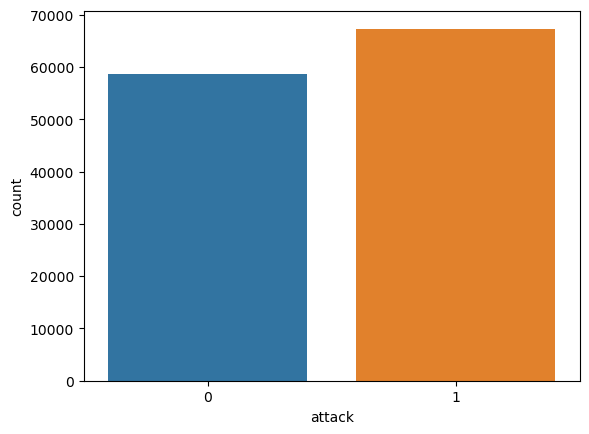

In [14]:
sns.countplot(df['attack'])


In [15]:
print("Class distribution: {}".format(Counter(y)))


Class distribution: Counter({1: 67343, 0: 58630})


In [16]:
#scaling the data
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)


In [17]:
import keras
import keras.layers as layers
from keras.models import *

In [18]:
X.shape


(125973, 38)

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
   layers.InputLayer(input_shape=(X_transformed.shape[1])),  # Removed the first dimension (125973)
   layers.Dense(32, activation='relu'),
   layers.Dense(64, activation='relu'),
   layers.Dense(128,activation='relu'),
   layers.Dense(64,activation='relu'),
   layers.Dense(32, activation='relu'),
   layers.Dense(1, activation='sigmoid')

    

])


          

In [20]:
#compiling and fitting the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_transformed, y, batch_size=32, epochs=10)



Epoch 1/10
3937/3937 [==============================] - 7s 2ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 2/10
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0092 - accuracy: 0.9963
Epoch 3/10
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0075 - accuracy: 0.9973
Epoch 4/10
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 5/10
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 6/10
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0047 - accuracy: 0.9984
Epoch 7/10
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0046 - accuracy: 0.9984
Epoch 8/10
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0043 - accuracy: 0.9986
Epoch 9/10
3937/3937 [==============================] - 6s 2ms/step - loss: 0.0035 - accuracy: 0.9987
Epoch 10/10
3937/3937 [==============================] - 6s 2ms/step - loss: 0.003

In [21]:
train_predict  = np.round((model.predict(X_transformed)))

In [22]:
print(classification_report(y, train_predict))
#we can clearly see there is some overfitting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58630
           1       1.00      1.00      1.00     67343

    accuracy                           1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973



In [23]:
test_df = pd.read_csv("kaggle/Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
test_df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [24]:
test_df.select_dtypes(exclude=[np.number])


,protocoltype,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,private,REJ,neptune
2,tcp,ftp_data,SF,normal
3,icmp,eco_i,SF,saint
4,tcp,telnet,RSTO,mscan
...,...,...,...,...
22539,tcp,smtp,SF,normal
22540,tcp,http,SF,normal
22541,tcp,http,SF,back
22542,udp,domain_u,SF,normal


In [25]:
test_df['attack'].loc[test_df['attack']!='normal']='attack'


In [26]:
test_df['protocoltype']=le.fit_transform(test_df['protocoltype'])
test_df['service']=le.fit_transform(test_df['service'])
test_df['flag']=le.fit_transform(test_df['flag'])
test_df['attack']=le.fit_transform(test_df['attack'])

In [27]:
test_df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)


In [28]:
X_test=test_df.drop(['attack'],axis=1)
y_test=test_df['attack']


In [29]:
#listing the features
for col in X_test.columns:
    print(col)

duration
protocoltype
service
flag
srcbytes
dstbytes
wrongfragment
hot
loggedin
numcompromised
rootshell
suattempted
numroot
numfilecreations
numshells
numaccessfiles
ishostlogin
isguestlogin
count
srvcount
serrorrate
srvserrorrate
rerrorrate
srvrerrorrate
samesrvrate
diffsrvrate
srvdiffhostrate
dsthostcount
dsthostsrvcount
dsthostsamesrvrate
dsthostdiffsrvrate
dsthostsamesrcportrate
dsthostsrvdiffhostrate
dsthostserrorrate
dsthostsrvserrorrate
dsthostrerrorrate
dsthostsrvrerrorrate
lastflag


<AxesSubplot:xlabel='attack', ylabel='count'>

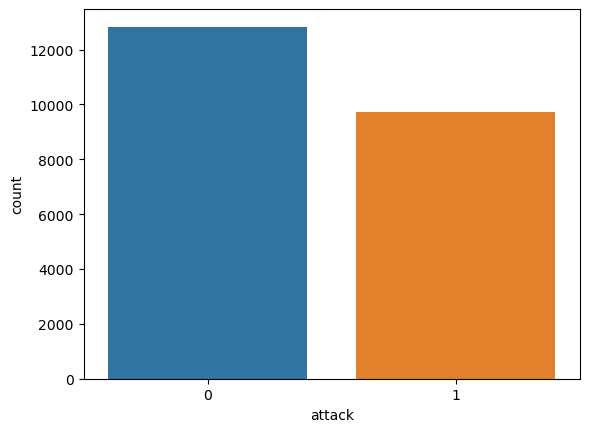

In [30]:

sns.countplot(test_df['attack'])


In [31]:
X_test_transformed = scaler.transform(X_test)



In [32]:
test_predict=np.round(model.predict(X_test_transformed))



In [33]:
print(accuracy_score(y_test, test_predict))


0.8555269694819021


In [34]:
target_names=["attack","normal"]

print(classification_report(y_test, test_predict))


              precision    recall  f1-score   support

           0       0.97      0.77      0.86     12833
           1       0.76      0.97      0.85      9711

    accuracy                           0.86     22544
   macro avg       0.87      0.87      0.86     22544
weighted avg       0.88      0.86      0.86     22544

